4-year transition matrix (P^4):
 [[0.31  0.414 0.204 0.072 0.032]
 [0.222 0.422 0.234 0.082 0.056]
 [0.18  0.421 0.258 0.095 0.077]
 [0.118 0.348 0.243 0.098 0.239]
 [0.    0.    0.    0.    1.   ]]

Initial patient distribution:  [0.337 0.449 0.194 0.2   0.   ]

Expected patient distribution after 4 years:  [0.263 0.48  0.272 0.099 0.099]

Initial Mean Grade: 2.62
Final Mean Grade after 4 years: 2.93


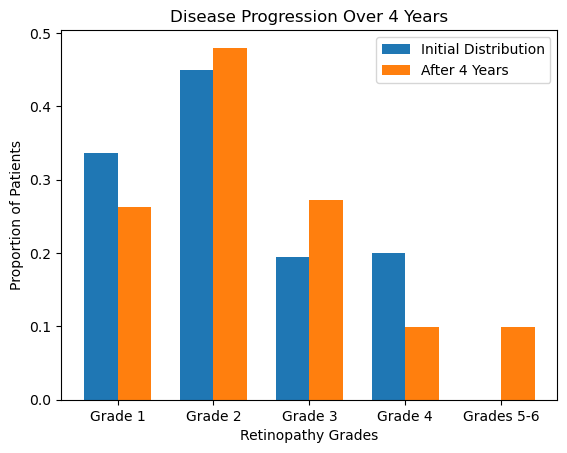

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 1-year transition matrix P
P = np.array([
    [0.65, 0.27, 0.06, 0.03, 0.00],
    [0.16, 0.59, 0.20, 0.04, 0.01],
    [0.04, 0.40, 0.44, 0.12, 0.01],
    [0.00, 0.13, 0.38, 0.38, 0.13],
    [0.00, 0.00, 0.00, 0.00, 1.00]
])

# Compute the 4-year transition matrix P^4
P_4 = np.linalg.matrix_power(P, 4)

# Initial patient distribution
pi_0 = np.array([0.337, 0.449, 0.194, 0.200, 0.00])

# Compute the expected patient distribution after 4 years
pi_4 = np.dot(pi_0, P_4)

# Compute the mean grade
grades = np.array([1, 2, 3, 4, 5])
initial_mean_grade = round(np.dot(pi_0, grades), 2)
final_mean_grade = round(np.dot(pi_4, grades), 2)

# Print results
print("4-year transition matrix (P^4):\n", np.round(P_4, 3))
print("\nInitial patient distribution: ", np.round(pi_0, 3))
print("\nExpected patient distribution after 4 years: ", np.round(pi_4, 3))
print(f"\nInitial Mean Grade: {initial_mean_grade}")
print(f"Final Mean Grade after 4 years: {final_mean_grade}")

# Plot the initial and final distributions
stages = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grades 5-6']

def plot_distribution(before, after, title):
    x = np.arange(len(stages))
    width = 0.35  # width of the bars
    
    fig, ax = plt.subplots()
    bars1 = ax.bar(x - width/2, before, width, label='Initial Distribution')
    bars2 = ax.bar(x + width/2, after, width, label='After 4 Years')
    
    ax.set_xlabel('Retinopathy Grades')
    ax.set_ylabel('Proportion of Patients')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(stages)
    ax.legend()
    
    plt.show()

# Plot the comparison
plot_distribution(pi_0, pi_4, "Disease Progression Over 4 Years")


## Validating Model


Predicted patient distribution after 4 years:  [0.263 0.48  0.272 0.099 0.099]
Observed patient distribution after 4 years:  [0.268 0.429 0.203 0.064 0.036]
Predicted Mean Grade after 4 years: 2.93
Observed Mean Grade after 4 years: 2.17

Validation Metric (Euclidean Distance): 0.1123


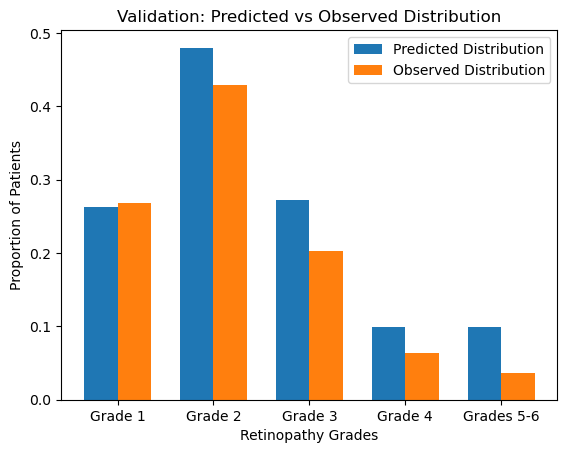

In [23]:
from scipy.spatial.distance import euclidean

# Compute the expected patient distribution after 4 years
predicted_pi_4 = pi_4

# Simulated observed distribution (this should be replaced with real-world data if available)
observed_pi_4 = np.array([0.268, 0.429, 0.203, 0.064, 0.036])  # Example real-world data

# Compute the mean grade of predicted and observed
predicted_mean_grade = round(np.dot(predicted_pi_4, grades), 2)
observed_mean_grade = round(np.dot(observed_pi_4, grades), 2)

# Compute Euclidean distance as a simple validation metric
distance = round(euclidean(predicted_pi_4, observed_pi_4), 4)

# Print results
print("\nPredicted patient distribution after 4 years: ", np.round(predicted_pi_4, 3))
print("Observed patient distribution after 4 years: ", np.round(observed_pi_4, 3))
print(f"Predicted Mean Grade after 4 years: {predicted_mean_grade}")
print(f"Observed Mean Grade after 4 years: {observed_mean_grade}")
print(f"\nValidation Metric (Euclidean Distance): {distance}")

# Plot the predicted vs observed distributions
def plot_validation(predicted, observed, title):
    x = np.arange(len(stages))
    width = 0.35  # width of the bars
    
    fig, ax = plt.subplots()
    bars1 = ax.bar(x - width/2, predicted, width, label='Predicted Distribution')
    bars2 = ax.bar(x + width/2, observed, width, label='Observed Distribution')
    
    ax.set_xlabel('Retinopathy Grades')
    ax.set_ylabel('Proportion of Patients')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(stages)
    ax.legend()
    
    plt.show()

# Plot the comparison
plot_validation(predicted_pi_4, observed_pi_4, "Validation: Predicted vs Observed Distribution")